## 1. 과적합

### 1.1 과적합

### 1.2 과적합 방지

In [1]:
# 1. 조기 종료
# 2. 드롭아웃
# 3. 가중치 규제

## 2. 경사 소실

### 2.1 경사 소실

In [2]:
# 1. 활성화 함수의 변경
# 2. 가중치 초기값 변경
# 3. 작은 학습률
# 4. 정규화

### 2.2 활성화 함수

In [3]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('ggplot')

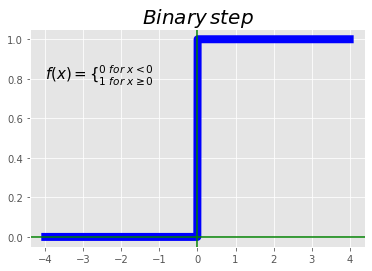

In [4]:
# 1. binary step
# x가 0보다 작으면 0 출력, 0보다 크면 1 출력
x = np.linspace(start=-4, stop=4, num=1000)
y = [1 if data >= 0 else 0 for data in x]

plt.plot(x, y, c='b', lw=8)
plt.axvline(0, c='g')
plt.axhline(0, c='g')

plt.title(r"$Binary\/step$", fontsize=20)
plt.text(-4, 0.8, r"$f(x)=\{ \genfrac{}{}{0}{}{0 \/\/ for \/\/ x<0}{1 \/\/ for \/\/ x \geq 0 }}$", fontsize=15)
plt.show()

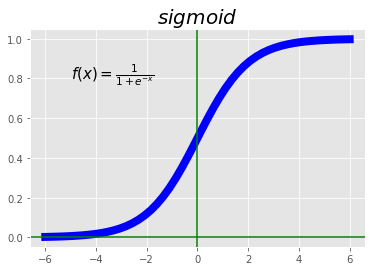

In [5]:
# 2. sigmoid
# 0~1 사이 값으로 출력
# x값이 0보다 작을수록 y값은 0에 수렴, x값이 0이면 y값은 0.5, x값이 0보다 클수록 y값은 1에 수렴
# 항상 양의 값 출력됨.
# x값이 음수가 존재하더라도 출력은 항상 양수로 편향되어 출력되는 경향 존재
x = np.linspace(start=-6, stop=6, num=50)
y = 1/(1+np.exp(-x))

plt.plot(x, y, c='b', lw=8)
plt.axvline(0, c='g')
plt.axhline(0, c='g')

plt.title(r"$sigmoid$", fontsize=20)
plt.text(-5, 0.8, r"$f(x)=\frac{1}{1+e^{-x}}$", fontsize=15)
plt.show()

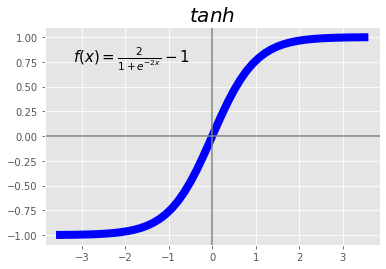

In [7]:
# 3. tanh
# -1~1 값 출력
x = np.linspace(start=-3.5, stop=3.5, num=50)
y = np.tanh(x)

plt.plot(x, y, c="blue", lw=8)
plt.axvline(0, c="grey")
plt.axhline(0, c="grey")

plt.title(r"$tanh$", fontsize=20)
plt.text(-3.2,0.75,r"$f(x)=\frac{2}{1+e^{-2x}}-1$", fontsize=15)
plt.show()

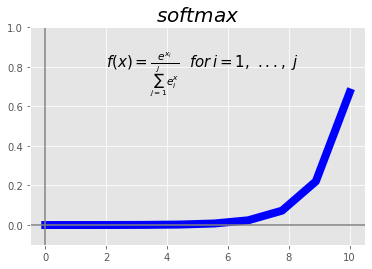

In [8]:
# 4. softmax
# x축에 대한 y축 값의 모든 합은 1
# 주로 다중 분류 문제 해결 위해 사용됨
# 분류를 위한 인공신경망의 출력층의 활성화 함수로 사용됨.
def softmax(input):
    return np.exp(input) / (np.sum(np.exp(input)))

x = np.linspace(start=0, stop=10, num=10)
y = softmax(x)

plt.plot(x, y, c="blue", lw=8)
plt.ylim(-0.1, 1)
plt.axvline(0, c="grey")
plt.axhline(0, c="grey")

plt.title(r"$softmax$", fontsize=20)
plt.text(2, 0.8, r"$f(x)=\frac{e^{x_i}}{\sum_{j=1}^Je^x_i}\/\/ \/\/ for\/ i=1,\/\/...,\/\/j$", fontsize=15)
plt.show()

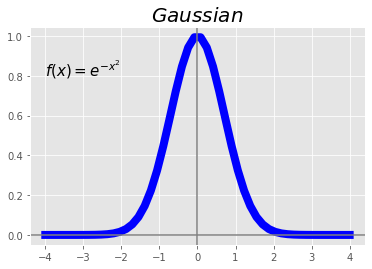

In [9]:
# 5. Gaussian
x = np.linspace(start=-4, stop=4, num=50)
y = np.exp(-(x**2))

plt.plot(x, y, c="blue", lw=8)
plt.axvline(0, c="grey")
plt.axhline(0, c="grey")

plt.title(r"$Gaussian$", fontsize=20)
plt.text(-4, 0.8, r"$f(x)=e^{-x^2 }$", fontsize=15)
plt.show()

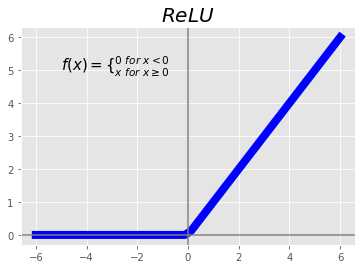

In [10]:
# 6. ReLU
# x가 0보다 작으면 y는 0이 출력, x가 0보다 크면 y는 x값 그대로 출력
# 입력이 0보다 크면 특정 값에 수렴하지 않음
x = np.linspace(start=-6, stop=6, num=50)
y = [ data if data>=0 else 0 for data in x]

plt.plot(x, y, c="blue", lw=8)
plt.axvline(0, c="grey")
plt.axhline(0, c="grey")

plt.title(r"$ReLU$", fontsize=20)
plt.text(-5, 5, r"$f(x)=\{ \genfrac{}{}{0}{}{0 \/\/ for \/\/x<0}{x \/\/ for \/\/ x \geq 0 }} $", fontsize=15)
plt.show()

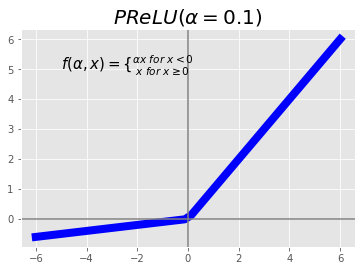

In [11]:
# 7. LeackReLU, PReLU
x = np.linspace(start=-6, stop=6, num=50)
y = [ data if data>=0 else 0.1*data for data in x]

plt.plot(x, y, c="blue", lw=8)
plt.axvline(0, c="grey")
plt.axhline(0, c="grey")

plt.title(r"$PReLU(\alpha=0.1)$", fontsize=20)
plt.text(-5, 5, r"$f(\alpha, x)=\{ \genfrac{}{}{0}{}{\alpha x\/\/ for \/\/ x<0}{x \/\/ for \/\/ x \geq 0 }}$", fontsize=15)
plt.show()

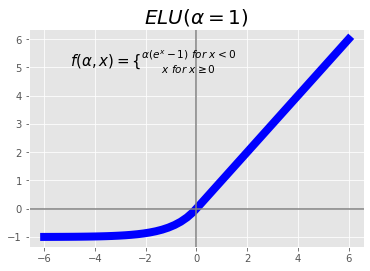

In [12]:
# 8. ELU
# 음수값이 0에 가까우면 기울기의 변화가 크고, 0에서 멀어질수록 기울기의 변화가 적음
x = np.linspace(start=-6, stop=6, num=50)
y = [ data if data>=0 else 1*(np.e**data-1) for data in x]

plt.plot(x, y, c="blue", lw=8)
plt.axvline(0, c="grey")
plt.axhline(0, c="grey")

plt.title(r"$ELU(\alpha=1)$", fontsize=20)
plt.text(-5, 5, r"$f(\alpha,x)=\{\genfrac{}{}{0}{}{\alpha (e^x-1) \/\/ for \/\/ x<0}{x \/\/ for \/\/ x \geq 0}}$", fontsize=15)
plt.show()

In [13]:
# 9. 활성화 함수의 변화
# ELU => LeackyReLU => ReLU => tanh => sigmoid

### 2.3 가중치 초기화

In [14]:
# 활성화 함수가 시그모이드일 경우, 세이비어 초기화
# relu일 경우, 히 초기화 적절

### 2.4 배치정규화

## 3. 훈련 최적화

### 3.1 손실함수

### 3.2 옵티마이저

### 3.3 옵티마이저 비교

### 3.4 케라스의 옵티마이저